In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [4]:
# import dataset
df = pd.read_csv('20250304AIC_SIE.csv')

In [5]:
# data exploration

In [7]:
df

,Unnamed: 0,Channel,Plastic,15_AH,15_AL,15_BH,15_BL,15_CH,15_CL,15_DH,...,300_GH,300_GL,300_KH,300_KL,300_N0,300_QH,300_QL,300_YH,300_YL,Group_PN
0,0,0,1,0.166927,2.175916,0.881277,0.003497,1.219365,-1.983180,-0.460486,...,4.005282,5.723899,7.749348,1.155791,2.582624,-1.343062,0.007146,-23.165213,-0.653512,Null
1,1,1,1,0.801681,3.598421,0.702255,0.930768,-0.114646,-0.984873,-1.212374,...,3.021579,2.537093,8.872752,10.077382,2.568037,0.974729,-6.850790,-5.560691,-0.037317,Null
2,2,2,1,2.218869,1.155401,2.391873,0.736546,-0.679281,0.651705,-1.167403,...,0.590258,0.103394,12.425011,8.508347,1.709214,0.507334,-6.239490,6.931245,-1.865424,Null
3,3,3,1,0.604514,-0.312643,1.213956,1.125154,2.076118,1.497056,1.618181,...,4.370815,4.857196,8.762183,8.011682,-6.615399,-0.237553,-1.115402,1.422387,-1.627180,Null
4,4,4,1,-0.736714,-0.211242,0.856275,1.028680,-2.403230,1.154672,-1.001334,...,12.768425,8.847427,-4.365464,0.231290,-9.235159,-1.527575,-5.197758,0.574300,-6.764768,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,299,11,SSM,-0.071394,-0.338306,1.066807,2.327670,1.348699,-1.276695,-1.083237,...,-10.017083,-4.765624,-1.637563,11.093840,-1.642838,-3.399676,8.580085,4.687860,3.185854,Plastic
300,300,12,SSM,-1.667394,-3.884904,0.369641,2.777060,2.133221,2.261900,-3.174687,...,-4.006834,0.898129,-5.102575,1.967473,0.610701,-1.213422,-1.202025,-8.907379,-3.275961,Plastic
301,301,13,SSM,-0.617882,-0.367508,0.485209,0.838641,3.380793,-0.359241,0.246750,...,-8.652662,-4.852919,8.948185,6.632971,5.864733,-2.079188,2.205121,-3.546288,-3.300219,Plastic
302,302,14,SSM,-2.409753,0.714529,0.813448,4.403629,4.876518,1.324076,0.279954,...,-4.487625,-2.646549,-4.166587,3.445973,-4.901512,3.311285,-2.320860,7.121055,-3.287548,Plastic


In [11]:
df['Group_PN'].describe

<bound method NDFrame.describe of 0         Null
1         Null
2         Null
3         Null
4         Null
        ...   
299    Plastic
300    Plastic
301    Plastic
302    Plastic
303    Plastic
Name: Group_PN, Length: 304, dtype: object>

In [13]:
df.shape

(304, 344)

In [15]:
print(df.columns.values)

['Unnamed: 0' 'Channel' 'Plastic' '15_AH' '15_AL' '15_BH' '15_BL' '15_CH'
 '15_CL' '15_DH' '15_DL' '15_GH' '15_GL' '15_KH' '15_KL' '15_N0' '15_QH'
 '15_QL' '15_YH' '15_YL' '30_AH' '30_AL' '30_BH' '30_BL' '30_CH' '30_CL'
 '30_DH' '30_DL' '30_GH' '30_GL' '30_KH' '30_KL' '30_N0' '30_QH' '30_QL'
 '30_YH' '30_YL' '45_AH' '45_AL' '45_BH' '45_BL' '45_CH' '45_CL' '45_DH'
 '45_DL' '45_GH' '45_GL' '45_KH' '45_KL' '45_N0' '45_QH' '45_QL' '45_YH'
 '45_YL' '60_AH' '60_AL' '60_BH' '60_BL' '60_CH' '60_CL' '60_DH' '60_DL'
 '60_GH' '60_GL' '60_KH' '60_KL' '60_N0' '60_QH' '60_QL' '60_YH' '60_YL'
 '75_AH' '75_AL' '75_BH' '75_BL' '75_CH' '75_CL' '75_DH' '75_DL' '75_GH'
 '75_GL' '75_KH' '75_KL' '75_N0' '75_QH' '75_QL' '75_YH' '75_YL' '90_AH'
 '90_AL' '90_BH' '90_BL' '90_CH' '90_CL' '90_DH' '90_DL' '90_GH' '90_GL'
 '90_KH' '90_KL' '90_N0' '90_QH' '90_QL' '90_YH' '90_YL' '105_AH' '105_AL'
 '105_BH' '105_BL' '105_CH' '105_CL' '105_DH' '105_DL' '105_GH' '105_GL'
 '105_KH' '105_KL' '105_N0' '105_QH' '105_QL' '1

In [17]:
df.head()

,Unnamed: 0,Channel,Plastic,15_AH,15_AL,15_BH,15_BL,15_CH,15_CL,15_DH,...,300_GH,300_GL,300_KH,300_KL,300_N0,300_QH,300_QL,300_YH,300_YL,Group_PN
0,0,0,1,0.166927,2.175916,0.881277,0.003497,1.219365,-1.983180,-0.460486,...,4.005282,5.723899,7.749348,1.155791,2.582624,-1.343062,0.007146,-23.165213,-0.653512,Null
1,1,1,1,0.801681,3.598421,0.702255,0.930768,-0.114646,-0.984873,-1.212374,...,3.021579,2.537093,8.872752,10.077382,2.568037,0.974729,-6.850790,-5.560691,-0.037317,Null
2,2,2,1,2.218869,1.155401,2.391873,0.736546,-0.679281,0.651705,-1.167403,...,0.590258,0.103394,12.425011,8.508347,1.709214,0.507334,-6.239490,6.931245,-1.865424,Null
3,3,3,1,0.604514,-0.312643,1.213956,1.125154,2.076118,1.497056,1.618181,...,4.370815,4.857196,8.762183,8.011682,-6.615399,-0.237553,-1.115402,1.422387,-1.627180,Null
4,4,4,1,-0.736714,-0.211242,0.856275,1.028680,-2.403230,1.154672,-1.001334,...,12.768425,8.847427,-4.365464,0.231290,-9.235159,-1.527575,-5.197758,0.574300,-6.764768,Null


In [19]:
df.tail()

,Unnamed: 0,Channel,Plastic,15_AH,15_AL,15_BH,15_BL,15_CH,15_CL,15_DH,...,300_GH,300_GL,300_KH,300_KL,300_N0,300_QH,300_QL,300_YH,300_YL,Group_PN
299,299,11,SSM,-0.071394,-0.338306,1.066807,2.327670,1.348699,-1.276695,-1.083237,...,-10.017083,-4.765624,-1.637563,11.093840,-1.642838,-3.399676,8.580085,4.687860,3.185854,Plastic
300,300,12,SSM,-1.667394,-3.884904,0.369641,2.777060,2.133221,2.261900,-3.174687,...,-4.006834,0.898129,-5.102575,1.967473,0.610701,-1.213422,-1.202025,-8.907379,-3.275961,Plastic
301,301,13,SSM,-0.617882,-0.367508,0.485209,0.838641,3.380793,-0.359241,0.246750,...,-8.652662,-4.852919,8.948185,6.632971,5.864733,-2.079188,2.205121,-3.546288,-3.300219,Plastic
302,302,14,SSM,-2.409753,0.714529,0.813448,4.403629,4.876518,1.324076,0.279954,...,-4.487625,-2.646549,-4.166587,3.445973,-4.901512,3.311285,-2.320860,7.121055,-3.287548,Plastic
303,303,15,SSM,-0.409301,-0.790255,0.721268,3.216050,1.517801,2.326252,-1.959762,...,-5.843843,-4.609185,-8.515478,1.387286,3.919418,2.567257,1.345004,3.420383,5.387999,Plastic


In [21]:
df.isnull().any()

Unnamed: 0    False
Channel       False
Plastic       False
15_AH         False
15_AL         False
              ...  
300_QH        False
300_QL        False
300_YH        False
300_YL        False
Group_PN      False
Length: 344, dtype: bool

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 344 entries, Unnamed: 0 to Group_PN
dtypes: float64(340), int64(2), object(2)
memory usage: 817.1+ KB


In [25]:
df.describe()

,Unnamed: 0,Channel,15_AH,15_AL,15_BH,15_BL,15_CH,15_CL,15_DH,15_DL,...,300_DL,300_GH,300_GL,300_KH,300_KL,300_N0,300_QH,300_QL,300_YH,300_YL
count,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,151.50000,7.500000,-0.266160,-0.366818,-0.511806,-0.340777,0.027573,0.048623,-0.073520,-0.124601,...,-0.948403,-0.635989,-0.182091,-0.793763,-0.059015,-0.675015,0.062244,-0.122940,-0.324140,-0.584337
std,87.90146,4.617373,1.659515,1.603289,2.447769,2.531719,1.480171,1.460055,1.310148,1.270601,...,4.574512,5.041700,5.265534,5.486329,4.968860,5.506588,4.416688,6.227148,5.956943,6.051195
min,0.00000,0.000000,-4.526306,-6.486178,-9.225669,-10.001606,-3.498498,-3.462385,-4.598266,-3.267663,...,-18.776178,-15.112217,-17.527462,-20.002687,-21.243190,-30.580882,-12.122081,-38.831070,-32.054535,-36.352434
25%,75.75000,3.750000,-1.308579,-1.206746,-1.235630,-1.232063,-0.959377,-0.869659,-0.941459,-1.057853,...,-3.787384,-3.959154,-3.295909,-3.990470,-2.765737,-3.965454,-2.772671,-2.508489,-3.425873,-3.442071
50%,151.50000,7.500000,-0.366431,-0.353910,-0.028112,-0.116708,-0.057302,0.076382,-0.030927,-0.271870,...,-0.855958,-0.493786,0.003581,-0.539538,-0.181735,-0.596135,-0.041792,0.094842,-0.062329,-0.284961
75%,227.25000,11.250000,0.627330,0.625613,0.960309,1.058847,0.972323,0.863339,0.725776,0.702854,...,2.085293,2.270536,2.977381,2.697071,3.105083,2.574804,2.687329,2.927737,3.030627,2.907774
max,303.00000,15.000000,7.600234,5.548532,5.779963,6.136366,5.218585,7.537839,4.378308,4.216752,...,13.933878,13.177202,40.781274,15.928406,15.056687,20.161592,15.992907,32.508214,27.878149,25.022753


In [27]:
df.columns

Index(['Unnamed: 0', 'Channel', 'Plastic', '15_AH', '15_AL', '15_BH', '15_BL',
       '15_CH', '15_CL', '15_DH',
       ...
       '300_GH', '300_GL', '300_KH', '300_KL', '300_N0', '300_QH', '300_QL',
       '300_YH', '300_YL', 'Group_PN'],
      dtype='object', length=344)

In [29]:
# data cleaning
# drop first 3 columns
df = df.drop(['Unnamed: 0', 'Channel', 'Plastic'], axis=1)
print(df)

        15_AH     15_AL     15_BH     15_BL     15_CH     15_CL     15_DH  \
0    0.166927  2.175916  0.881277  0.003497  1.219365 -1.983180 -0.460486   
1    0.801681  3.598421  0.702255  0.930768 -0.114646 -0.984873 -1.212374   
2    2.218869  1.155401  2.391873  0.736546 -0.679281  0.651705 -1.167403   
3    0.604514 -0.312643  1.213956  1.125154  2.076118  1.497056  1.618181   
4   -0.736714 -0.211242  0.856275  1.028680 -2.403230  1.154672 -1.001334   
..        ...       ...       ...       ...       ...       ...       ...   
299 -0.071394 -0.338306  1.066807  2.327670  1.348699 -1.276695 -1.083237   
300 -1.667394 -3.884904  0.369641  2.777060  2.133221  2.261900 -3.174687   
301 -0.617882 -0.367508  0.485209  0.838641  3.380793 -0.359241  0.246750   
302 -2.409753  0.714529  0.813448  4.403629  4.876518  1.324076  0.279954   
303 -0.409301 -0.790255  0.721268  3.216050  1.517801  2.326252 -1.959762   

        15_DL     15_GH     15_GL  ...     300_GH    300_GL     300_KH  \
0

In [31]:
# data preprocessing
# change 'Group_PN' encoding to 1-0
df['Group_PN'] = df['Group_PN'].replace({"Plastic": 1, "Null": 0})
print(df['Group_PN'])

0      0
1      0
2      0
3      0
4      0
      ..
299    1
300    1
301    1
302    1
303    1
Name: Group_PN, Length: 304, dtype: int64


In [33]:
# drop NA
df = df.dropna(subset=['Group_PN'])

In [35]:
df.shape

(304, 341)

In [37]:
# define X and y
X = df.iloc[:, :-1]
y = df['Group_PN']
print(X.columns)

Index(['15_AH', '15_AL', '15_BH', '15_BL', '15_CH', '15_CL', '15_DH', '15_DL',
       '15_GH', '15_GL',
       ...
       '300_DL', '300_GH', '300_GL', '300_KH', '300_KL', '300_N0', '300_QH',
       '300_QL', '300_YH', '300_YL'],
      dtype='object', length=340)


In [39]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# fit logistic regression 
logreg = linear_model.LogisticRegression(C=1)
#logreg.fit(X_train.iloc[:, 0:2], y_train)
logreg.fit(X_train, y_train)

LogisticRegression(C=1)

In [43]:
print('Model coefficients: ')
print('w_0=', logreg.intercept_[0],'; w_1=', logreg.coef_[0][0],'; w_2=', logreg.coef_[0][1])

Model coefficients: 
w_0= 7.116661119947154 ; w_1= 0.017206243575225353 ; w_2= -0.01031023858363749


In [45]:
# make predictions
y_pred = logreg.predict(X_test) 

compare = pd.DataFrame({'predict':y_pred, 'true':y_test}) 
compare

,predict,true
180,1,1
154,1,1
111,1,1
247,1,1
60,0,0
...,...,...
218,1,1
104,1,1
301,1,1
194,1,1


In [47]:
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred))
print("Intercept:", logreg.intercept_)
print("Classes:", logreg.classes_)
print("Iterations:", logreg.n_iter_)

Prediction Accuracy:  0.9508196721311475
Intercept: [7.11666112]
Classes: [0 1]
Iterations: [54]


TypeError: sequence item 0: expected str instance, numpy.int64 found

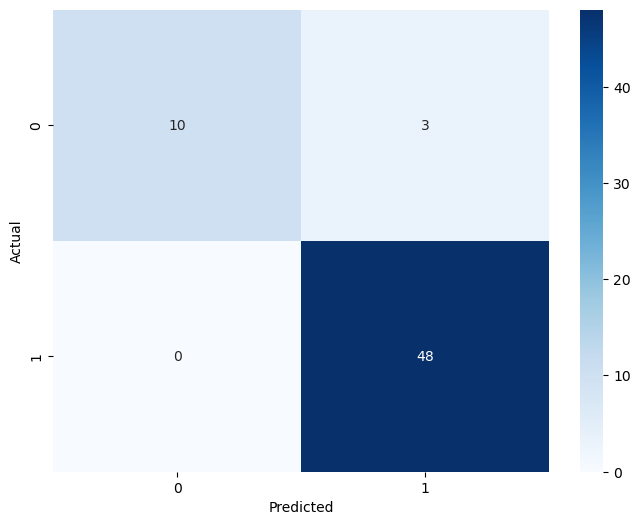

In [49]:
cm = confusion_matrix(y_test, y_pred)

group_name = 'Group_PN'
X = df[df.columns[:-1]]
y = df[group_name]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'LR Model Confusion Matrix')
plt.show()

In [51]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1}")

# Calculate F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score: {f2}")

Precision: 0.9705882352941176
Recall: 0.8846153846153846
F1 Score: 0.9196310935441371
F2 Score: 0.9876543209876544


In [53]:
# top 10 features of importance
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=11)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['30_BH', '30_CL', '45_CH', '45_QH', '90_N0', '150_AL', '150_CH',
       '150_KH', '240_DH', '285_QL', '300_GH'],
      dtype='object')


In [54]:
coeff = rfe.estimator_.coef_
print ('coefficients',coeff)

coefficients [[-0.42305204  0.60874835 -0.40664874  0.34408333 -0.38551349  0.29303056
   0.38278672  0.34733188  0.19812091  0.51846023 -0.57714473]]


In [55]:
feature_importance = pd.DataFrame({'Feature': ['30_BH', '30_CL', '45_CH', '45_QH', '90_N0', '150_AL', '150_CH',
       '150_KH', '285_QL', '300_GH'], 'Importance': [-0.27700841,  0.35684879, -0.25879313,  0.22194839, -0.18928806,  0.1407419,
   0.24111562,  0.20650062,  0.30787284, -0.36896089]})

feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False)
print(feature_importance)

  Feature  Importance
9  300_GH   -0.368961
1   30_CL    0.356849
8  285_QL    0.307873
0   30_BH   -0.277008
2   45_CH   -0.258793
6  150_CH    0.241116
3   45_QH    0.221948
7  150_KH    0.206501
4   90_N0   -0.189288
5  150_AL    0.140742


In [56]:
from sklearn.metrics import roc_auc_score
y_prob = logreg.predict_proba(X_test)[:,1]
roc=roc_auc_score(y_test, y_prob)
roc

0.9871794871794872

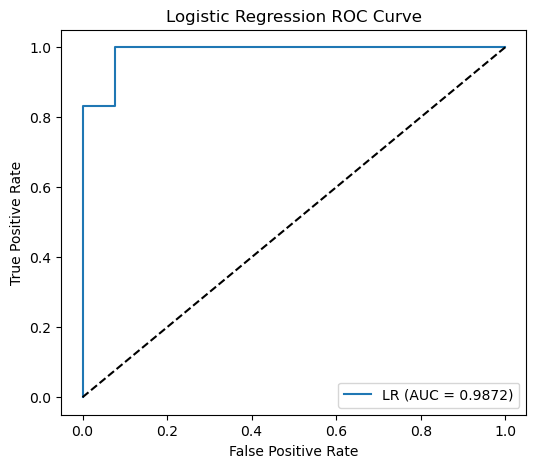

In [57]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'LR (AUC = {roc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()